In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

/var/folders/qx/dv5zms194lj0k025kmnl22jh0000gn/T/ipykernel_38515/3794829159.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

#Male1_ => Male Data of First Male
#Female1_ => Female Data of First Female
#Male2_ => Male Data of Second Male
#Female2_ => Female Data of Second Female
Male1_data1 = pd.read_csv("Cleaned_Data/cleaned-m1-lefthand.csv")
Male1_data2 = pd.read_csv("Cleaned_Data/cleaned-m1-righthand.csv")
Male1_data3 = pd.read_csv("Cleaned_Data/cleaned-m1-leftpocket.csv")
Male1_data4 = pd.read_csv("Cleaned_Data/cleaned-m1-rightpocket.csv")
Male1_data5 = pd.read_csv("Cleaned_Data/cleaned-m1-leftankle.csv")
Male1_data6 = pd.read_csv("Cleaned_Data/cleaned-m1-rightankle.csv")

Male2_data1 = pd.read_csv("Cleaned_Data/cleaned-m2-lefthand.csv")
Male2_data2 = pd.read_csv("Cleaned_Data/cleaned-m2-righthand.csv")
Male2_data3 = pd.read_csv("Cleaned_Data/cleaned-m2-leftpocket.csv")
Male2_data4 = pd.read_csv("Cleaned_Data/cleaned-m2-rightpocket.csv")
Male2_data5 = pd.read_csv("Cleaned_Data/cleaned-m2-leftankle.csv")
Male2_data6 = pd.read_csv("Cleaned_Data/cleaned-m2-rightankle.csv")

Female1_data1 = pd.read_csv("Cleaned_Data/cleaned-f1-lefthand.csv")
Female1_data2 = pd.read_csv("Cleaned_Data/cleaned-f1-righthand.csv")
Female1_data3 = pd.read_csv("Cleaned_Data/cleaned-f1-leftpocket.csv")
Female1_data4 = pd.read_csv("Cleaned_Data/cleaned-f1-rightpocket.csv")
Female1_data5 = pd.read_csv("Cleaned_Data/cleaned-f1-leftankle.csv")
Female1_data6 = pd.read_csv("Cleaned_Data/cleaned-f1-rightankle.csv")

Female2_data1 = pd.read_csv("Cleaned_Data/cleaned-f2-lefthand.csv")
Female2_data2 = pd.read_csv("Cleaned_Data/cleaned-f2-righthand.csv")
Female2_data3 = pd.read_csv("Cleaned_Data/cleaned-f2-leftpocket.csv")
Female2_data4 = pd.read_csv("Cleaned_Data/cleaned-f2-rightpocket.csv")
Female2_data5 = pd.read_csv("Cleaned_Data/cleaned-f2-leftankle.csv")
Female2_data6 = pd.read_csv("Cleaned_Data/cleaned-f2-rightankle.csv")

In [3]:
#Dataframe for Female Ankle Data
female_ankle_data = pd.concat([Female1_data5,Female1_data6,Female2_data5,Female2_data6],ignore_index=True)

#Dataframe for Female Hand Data
female_hand_data = pd.concat([Female1_data1,Female1_data2,Female2_data1,Female2_data2],ignore_index=True)

#Dataframe for Female Pocket Data
female_pocket_data = pd.concat([Female1_data3,Female1_data4,Female2_data3,Female2_data4],ignore_index=True)

#Dataframe for Male Ankle Data
male_ankle_data = pd.concat([Male1_data5,Male1_data6,Male2_data5,Male2_data6],ignore_index=True)

#Dataframe for Male Hand Data
male_hand_data = pd.concat([Male1_data1,Male1_data2,Male2_data1,Male2_data2],ignore_index=True)

#Dataframe for Male Pocket Data
male_pocket_data = pd.concat([Male1_data3,Male1_data4,Male2_data3,Male2_data4],ignore_index=True)


In [4]:
all_ankle_data = pd.concat([female_ankle_data,male_ankle_data],ignore_index=True)
all_hand_data = pd.concat([female_hand_data,male_hand_data],ignore_index=True)
all_pocket_data = pd.concat([female_pocket_data,male_pocket_data],ignore_index=True)

all_ankle_data.to_csv("training/all_ankle.csv")
all_hand_data.to_csv("training/all_hand.csv")
all_pocket_data.to_csv("training/all_pocket.csv")

In [34]:
female_data_list = [Female1_data1,Female1_data2, Female1_data3, Female1_data4, Female1_data5, Female1_data6, Female2_data1, Female2_data2, Female2_data3, Female2_data4, Female2_data5, Female2_data6]
female_data = pd.concat(female_data_list,ignore_index=True)
female_data.to_csv("training/female_data.csv")

In [35]:
male_data_list = [Male1_data1,Male1_data2, Male1_data3, Male1_data4, Male1_data5, Male1_data6, Male2_data1, Male2_data2, Male2_data3, Male2_data4, Male2_data5, Male2_data6]
male_data = pd.concat(male_data_list,ignore_index=True)
male_data.to_csv("training/male_data.csv")
male_data


,Unnamed: 0,time,New_AccelerationX,New_AccelerationY,New_AccelerationZ,new_NetAcceleration
0,992,10.003871,1.163354,-2.167719,-1.032401,2.668005
1,993,10.015779,1.078422,-1.989741,-1.301134,2.610558
2,994,10.023850,0.999105,-1.812978,-1.560622,2.592420
3,995,10.033803,0.931870,-1.637290,-1.801979,2.606958
4,996,10.047762,0.882251,-1.462580,-2.016615,2.642772
...,...,...,...,...,...,...
82781,7977,79.947169,0.575359,2.642424,-0.914380,2.854738
82782,7978,79.957244,0.255730,2.895083,-1.970000,3.511097
82783,7979,79.967374,0.131931,3.214690,-3.309986,4.616021
82784,7980,79.977802,0.153238,3.585465,-4.858372,6.040101


In [7]:
mean_data = lambda df: pd.DataFrame(df[['New_AccelerationX','New_AccelerationY','New_AccelerationZ','new_NetAcceleration']].mean()).T

In [8]:
female1_left_ankle_mean = mean_data(Female1_data5)
female2_left_ankle_mean = mean_data(Female1_data6)
female1_right_ankle_mean = mean_data(Female2_data5)
female2_right_ankle_mean = mean_data(Female2_data6)

male1_left_ankle_mean = mean_data(Male1_data5)
male2_left_ankle_mean = mean_data(Male2_data5)
male1_right_ankle_mean = mean_data(Male1_data6)
male2_right_ankle_mean = mean_data(Male2_data6)

female1_left_pocket_mean = mean_data(Female1_data3)
female2_left_pocket_mean = mean_data(Female2_data3)
female1_right_pocket_mean = mean_data(Female1_data4)
female2_right_pocket_mean = mean_data(Female2_data4)

male1_left_pocket_mean = mean_data(Male1_data3)
male2_left_pocket_mean = mean_data(Male2_data3)
male1_right_pocket_mean = mean_data(Male1_data4)
male2_right_pocket_mean = mean_data(Male2_data4)

female1_left_hand_mean = mean_data(Female1_data1)
female2_left_hand_mean = mean_data(Female2_data1)
female1_right_hand_mean = mean_data(Female1_data2)
female2_right_hand_mean = mean_data(Female2_data2)

male1_left_hand_mean = mean_data(Male1_data1)
male2_left_hand_mean = mean_data(Male2_data1)
male1_right_hand_mean = mean_data(Male1_data2)
male2_right_hand_mean = mean_data(Male2_data2)

In [9]:
ankle_mean = pd.concat([female1_left_ankle_mean,female2_left_ankle_mean,female1_right_ankle_mean,female2_right_ankle_mean,
                        male1_left_ankle_mean,male2_left_ankle_mean,male1_right_ankle_mean,male2_right_ankle_mean],ignore_index=True)

pocket_mean = pd.concat([female1_left_pocket_mean,female2_left_pocket_mean,female1_right_pocket_mean,female2_right_pocket_mean,
                        male1_left_pocket_mean,male2_left_pocket_mean,male1_right_pocket_mean,male2_right_pocket_mean],ignore_index=True)

hand_mean = pd.concat([female1_left_hand_mean,female2_left_hand_mean,female1_right_hand_mean,female2_right_hand_mean,
                        male1_left_hand_mean,male2_left_hand_mean,male1_right_hand_mean,male2_right_hand_mean],ignore_index=True)

In [10]:
Female1_data1_avg = mean_data(Female1_data1)
Female1_data2_avg = mean_data(Female1_data2)
Female1_data3_avg = mean_data(Female1_data3)
Female1_data4_avg = mean_data(Female1_data4)
Female1_data5_avg = mean_data(Female1_data6)
Female1_data6_avg = mean_data(Female1_data5)
Female2_data1_avg = mean_data(Female2_data1)
Female2_data2_avg = mean_data(Female2_data2)
Female2_data3_avg = mean_data(Female2_data3)
Female2_data4_avg = mean_data(Female2_data4)
Female2_data5_avg = mean_data(Female2_data5)
Female2_data6_avg = mean_data(Female2_data6)

In [11]:
Male1_data1_avg = mean_data(Male1_data1)
Male1_data2_avg = mean_data(Male1_data2)
Male1_data3_avg = mean_data(Male1_data3)
Male1_data4_avg = mean_data(Male1_data4)
Male1_data5_avg = mean_data(Male1_data6)
Male1_data6_avg = mean_data(Male1_data5)
Male2_data1_avg = mean_data(Male2_data1)
Male2_data2_avg = mean_data(Male2_data2)
Male2_data3_avg = mean_data(Male2_data3)
Male2_data4_avg = mean_data(Male2_data4)
Male2_data5_avg = mean_data(Male2_data5)
Male2_data6_avg = mean_data(Male2_data6)

In [12]:
female_data_mean = pd.concat(
    [
    Female1_data1_avg,
    Female1_data2_avg,
    Female1_data3_avg,
    Female1_data4_avg,
    Female1_data5_avg,
    Female1_data6_avg,
    Female2_data1_avg,
    Female2_data2_avg,
    Female2_data3_avg,
    Female2_data4_avg,
    Female2_data5_avg,
    Female2_data6_avg], ignore_index=True
)
male_data_mean = pd.concat(
   [
    Male1_data1_avg,
    Male1_data2_avg,
    Male1_data3_avg,
    Male1_data4_avg,
    Male1_data5_avg,
    Male1_data6_avg,
    Male2_data1_avg,
    Male2_data2_avg,
    Male2_data3_avg,
    Male2_data4_avg,
    Male2_data5_avg,
    Male2_data6_avg
] ,ignore_index=True
)


In [13]:
male_data_mean.columns = ['Mean_AccelerationX','Mean_AccelerationY','Mean_AccelerationZ', 'mean_NetAcceleration']
male_data_mean

,Mean_AccelerationX,Mean_AccelerationY,Mean_AccelerationZ,mean_NetAcceleration
0,-0.014508,-0.164560,0.008868,1.865518
1,-0.052908,-0.223579,0.066802,2.320074
2,0.257270,-0.556371,-0.220056,5.291893
3,-0.183763,-0.632608,-0.442691,5.356211
4,0.187470,1.919672,-0.265097,5.447977
5,0.822309,1.493824,-0.436558,5.507847
6,-0.043030,-0.128492,-0.015521,3.223761
7,-0.024446,-0.137603,-0.046460,3.295289
8,-0.050401,-4.451320,0.044898,9.808443
9,0.079114,-0.674474,0.624017,4.844656


In [14]:
female_data_mean.columns = ['Mean_AccelerationX','Mean_AccelerationY','Mean_AccelerationZ', 'mean_NetAcceleration']
female_data_mean

,Mean_AccelerationX,Mean_AccelerationY,Mean_AccelerationZ,mean_NetAcceleration
0,0.060258,-0.195880,0.049275,1.580267
1,0.059936,-0.240205,0.036063,1.391099
2,0.073394,-0.360238,-0.048933,4.059845
3,-0.104871,-0.398392,-0.123718,3.974278
4,-0.588563,1.181263,-0.162447,4.338477
5,-0.082471,1.331516,-0.111866,4.227227
6,0.003013,-0.638907,-0.170063,3.382828
7,0.512305,-1.011785,0.609402,4.377655
8,-0.012392,-0.673400,0.494193,4.923035
9,-0.238167,-0.561167,0.419430,5.045049


5.939576775068264


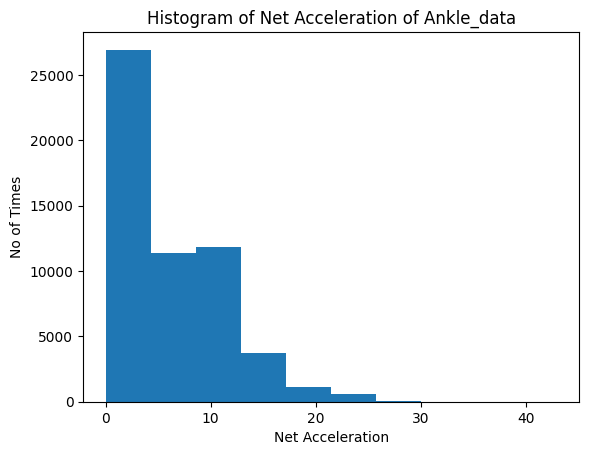

In [19]:
plt.hist(all_ankle_data['new_NetAcceleration'])
plt.xlabel("Net Acceleration")
plt.ylabel("No of Times")
plt.title("Histogram of Net Acceleration of Ankle_data")
#plt.savefig("Normal1.jpg")
print(ankle_mean['new_NetAcceleration'].mean())

2.6795615246299933


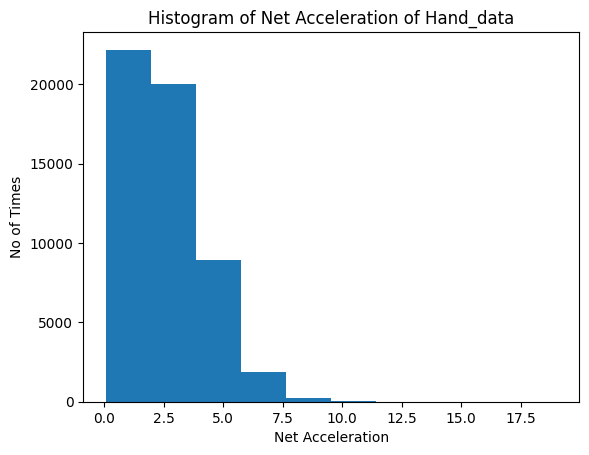

In [20]:
plt.hist(all_hand_data['new_NetAcceleration'])
plt.xlabel("Net Acceleration")
plt.ylabel("No of Times")
plt.title("Histogram of Net Acceleration of Hand_data")
print(hand_mean['new_NetAcceleration'].mean())

5.412926202491036


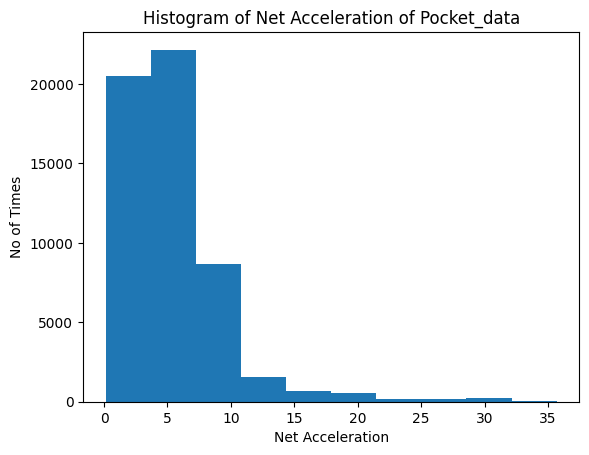

In [21]:
plt.hist(all_pocket_data['new_NetAcceleration'])
plt.xlabel("Net Acceleration")
plt.ylabel("No of Times")
plt.title("Histogram of Net Acceleration of Pocket_data")
#plt.savefig("Normal2.jpg")
print(pocket_mean['new_NetAcceleration'].mean())

4.260983541796798


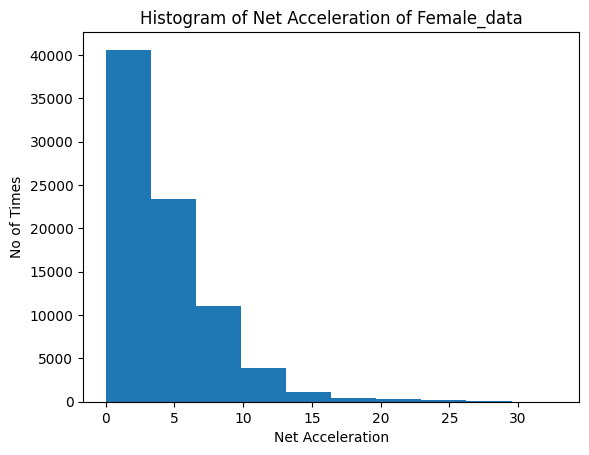

In [28]:
plt.hist(female_data['new_NetAcceleration'])
plt.xlabel("Net Acceleration")
plt.ylabel("No of Times")
plt.title("Histogram of Net Acceleration of Female_data")
#plt.savefig("Normal3.jpg");
print(female_data_mean['mean_NetAcceleration'].mean())

5.093726126329398


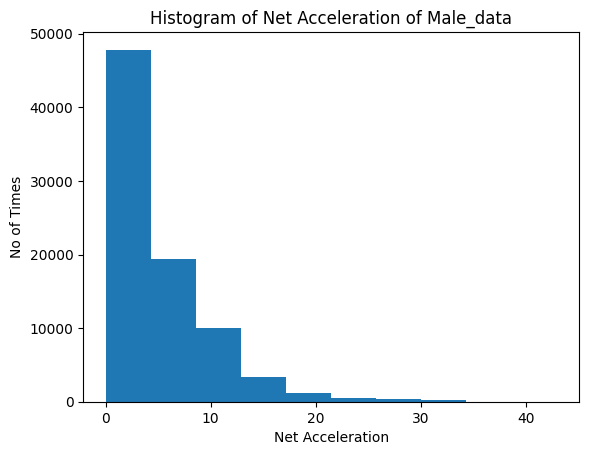

In [29]:
plt.hist(male_data['new_NetAcceleration'])
plt.xlabel("Net Acceleration")
plt.ylabel("No of Times")
plt.title("Histogram of Net Acceleration of Male_data")
print(male_data_mean['mean_NetAcceleration'].mean())

In [31]:
# Performing U test for Female Ankle vs Female Pocket
print('Female ankle vs pocket - P Value : ' + str(stats.mannwhitneyu(female_ankle_data['new_NetAcceleration'], female_pocket_data['new_NetAcceleration']).pvalue))


# Performing U test for Male Ankle vs Male Pocket
print('Male ankle vs pocket - P Value : ' + str(stats.mannwhitneyu(male_ankle_data['new_NetAcceleration'], male_pocket_data['new_NetAcceleration']).pvalue))

#  for Male Ankle vs Male Hand
print('Male Ankle vs Hand - P Value : ' + str(stats.mannwhitneyu(male_ankle_data['new_NetAcceleration'], male_hand_data['new_NetAcceleration']).pvalue))

# Performing U test for Male Hand vs Male Pocket
print('Male hand vs pocket - P Value : ' + str(stats.mannwhitneyu(male_hand_data['new_NetAcceleration'], male_pocket_data['new_NetAcceleration']).pvalue))

#  for Female Ankle vs Female Hand
print('Female Ankle vs Hand - P Value : ' + str(stats.mannwhitneyu(female_ankle_data['new_NetAcceleration'], female_hand_data['new_NetAcceleration']).pvalue))

# Performing U test for Female Hand vs Female Pocket
print('Female hand vs pocket - P Value : ' + str(stats.mannwhitneyu(female_hand_data['new_NetAcceleration'], female_pocket_data['new_NetAcceleration']).pvalue))

Female ankle vs pocket - P Value : 0.04037946273067447
Male ankle vs pocket - P Value : 1.1131470336265456e-11
Male Ankle vs Hand - P Value : 0.0
Male hand vs pocket - P Value : 0.0
Female Ankle vs Hand - P Value : 0.0
Female hand vs pocket - P Value : 0.0


In [33]:
# Between Male and Female
anova = stats.f_oneway(female_data_mean['mean_NetAcceleration'],male_data_mean['mean_NetAcceleration'])
print(anova)
print(anova.pvalue)

F_onewayResult(statistic=1.0413273830044973, pvalue=0.3186041642258874)
0.3186041642258874


In [32]:
#Between Ankle , Hand and Pocket
anova = stats.f_oneway(ankle_mean['new_NetAcceleration'],hand_mean['new_NetAcceleration'],pocket_mean['new_NetAcceleration'])
print(anova)
print(anova.pvalue)

F_onewayResult(statistic=11.949014631050206, pvalue=0.0003427016290012456)
0.0003427016290012456


In [37]:
# Comparsion of Means between Ankle, Hand and Pocket
x_data = pd.DataFrame({'Ankle': ankle_mean['new_NetAcceleration'], 'Hand': hand_mean['new_NetAcceleration'], 'Pocket': pocket_mean['new_NetAcceleration']})
x_melt = pd.melt(x_data).dropna()
posthoc = pairwise_tukeyhsd(
    x_melt['value'], x_melt['variable'],
    alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 Ankle   Hand    -3.26 0.0005 -5.0647 -1.4553   True
 Ankle Pocket  -0.5267 0.7454 -2.3313   1.278  False
  Hand Pocket   2.7334 0.0028  0.9287  4.5381   True
----------------------------------------------------


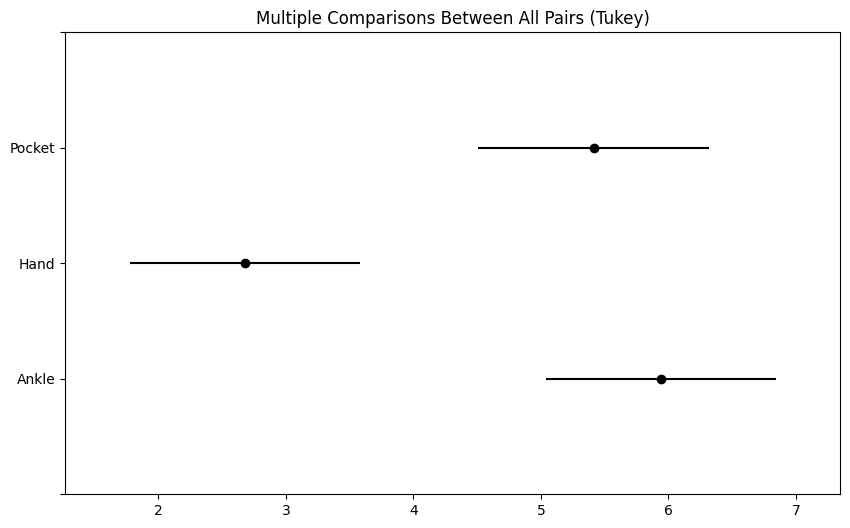

In [39]:
figure = posthoc.plot_simultaneous()

In [41]:
#Comparsion between Male and Female
x_data = pd.DataFrame({'Female': female_data_mean['mean_NetAcceleration'], 'Male': male_data_mean['mean_NetAcceleration']})
x_melt = pd.melt(x_data).dropna()
posthoc = pairwise_tukeyhsd(
    x_melt['value'], x_melt['variable'],
    alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Female   Male   0.8327 0.3186 -0.8596 2.5251  False
---------------------------------------------------


In [43]:

from scipy import integrate


In [53]:
# Calculating velocity of mean Net Accelerations of Pocket
velocity = integrate.trapezoid(pocket_mean['new_NetAcceleration'])
velocity

38.85115939293078

In [52]:
# Calculating velocity of mean Net Accelerations of Hand
velocity = integrate.trapezoid(hand_mean['new_NetAcceleration'])
velocity

18.998713984162578

In [48]:
# Calculating velocity of mean Net Accelerations of Ankle
velocity = integrate.trapezoid(ankle_mean['new_NetAcceleration'])
velocity

42.089260876824305

In [50]:
# Calculating velocity of mean Net Accelerations of Female
velocity = integrate.trapezoid(female_data_mean['mean_NetAcceleration'])
velocity

46.61932009652471

In [51]:
# Calculating velocity of mean Net Accelerations of Male
velocity = integrate.trapezoid(male_data_mean['mean_NetAcceleration'])
velocity


56.87821481217363